# Introduction

As the entertainment industry surges and major corporations dive into original video content, a new company is poised to enter the competitive world of movie-making. Recognizing the complexities of the film business, especially for newcomers, the company seeks to establish a strong foundation by understanding current box office trends and transforming these insights into a strategic roadmap for their new studio.

To ensure a successful start, the company has enlisted our help as Group 7 members to identify which types of films are currently performing well at the box office and translate these findings into actionable recommendations.

## Business Understanding

The Business objective is to identify which film genres will consistently bring in the most revenue for this new studio.  There are many elements that contribute to a film's success and our goal is to analyze these factors through Exploratory Data Analysis (EDA) and linear regression. This will allow us to uncover trends and connections that will guide the studio's production choices. 

Ultimately, we want to translate these insights into actionable recommendations that will help the studio create films that captivate audiences and turn a profit.

## Objectives

1.To determine which types of films are performing best at the box office.

2.To identify key factors that contribute to a film's success.

## Specific Objectives

1.Investigate key variables such as production budgets, domestic and worldwide gross revenues, release years, and genres.

2.Develop predictive models to determine factors significantly impacting box office performance.

3.To investigate the relationship between production budget and box office revenue.

4.To examine the impact of release timing on a film's success.

5.To provide data-driven recommendations for film production and release strategies.

### Data Understanding

In this analysis, we will use a datasets from:

    1. IMD Data Base 
    2. Box Office 
    3. Rotten Tomatoes
    4. The Movie
    5. The Numbers

The data containsning information about various films, including their genres, budgets, box office revenues, and release dailic.
Understanding the structure and contents of our data will be the first step in uncovering the insights needed to guide our new movie studio's strategy.

## `im.db` Data Base Data Cleaning

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **Connecting to SQLite Database:** Establishe a connection to an SQLite database stored in the file named "im.db". The `sqlite3.connect()` function returns a connection object that allows interaction with the database.

- **Reading Data from CSV:** Read data from a CSV file named "bom.movie_gross.csv" and stores it in the DataFrame `bomdf`.

In [2]:
# Connecting to SQLite Database
conn = sqlite3.connect('./Data/im.db')
# Reading Data from CSV
bomdf = pd.read_csv("./Data/bom.movie_gross.csv")

- Retrieve information about the database schema from the `sqlite_master` table. It includes details about tables, views, and other database objects. 

In [3]:
query = """
    SELECT *
    FROM sqlite_master;
"""
pd.read_sql(query, conn)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,imdf,imdf,41369,"CREATE TABLE ""imdf"" (\n""year"" INTEGER,\n ""run..."
9,table,TN_df,TN_df,41371,"CREATE TABLE ""TN_df"" (\n""movie"" TEXT,\n ""prod..."


Retrieve data from three tables (`movie_basics`, `movie_ratings`, and `movie_akas`) using SQL joins.

1. **Tables Involved:**
   - `movie_basics`: Contains information about movie titles, release years, runtime, and genres.
   - `movie_ratings`: Includes average ratings and the number of votes for each movie.
   - `movie_akas`: Provides additional details such as alternative titles, regions, languages, and attributes.

2. **SQL Query:**
   - The query combines data from these tables using `JOIN` operations based on the common column 'movie_id'.
   - It selects specific columns from each table.

3. **Result:**
   - The retrieved data is stored in the DataFrame 'imdf'.

In [4]:
query = """    
    SELECT  mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres, 
            mr.averagerating, mr.numvotes, 
            ma.ordering, ma.title, ma.region, ma.language, ma.types, ma.attributes, ma.is_original_title
    FROM movie_basics AS mb
        JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        JOIN movie_akas AS ma
            ON mb.movie_id = ma.movie_id
"""
imdf = pd.read_sql(query, conn)

Will use `info()` method to get information about the `imdf` Data Frame. Here's a brief summary of the columns:

1. `movie_id`: Unique identifier for each movie.
2. `primary_title`: The primary title of the movie.
3. `original_title`: The original title of the movie.
4. `start_year`: The year when the movie was released.
5. `runtime_minutes`: Duration of the movie in minutes.
6. `genres`: Genre(s) associated with the movie.
7. `averagerating`: Average rating given to the movie.
8. `numvotes`: Number of votes/ratings received by the movie.
9. `ordering`: An ordering quantity of the movies.
10. `region`: The region where the movie is relevant.
11. `language`: Language(s) in which the movie is available.
12. `is_original_title`: Indicates whether the title is the original one.

In [5]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

Checking for missing values (nulls) in your DataFrame:

1. `runtime_minutes`: There are 11,253 missing values.
2. `genres`: There are 1,185 missing values.
3. `region`: There are 43,465 missing values.
4. `language`: There are 224,726 missing values.
5. `types`: There are 108,538 missing values
6.  `attributes`: There are 248,882 missing values

In [6]:
imdf.isnull().sum()

movie_id                  0
primary_title             0
original_title            0
start_year                0
runtime_minutes       11253
genres                 1185
averagerating             0
numvotes                  0
ordering                  0
title                     0
region                43465
language             224726
types                108538
attributes           248882
is_original_title         0
dtype: int64

Calculating the missing value percentages for each column in the Data Frame:

- `movie_id`, `primary_title`, `original_title`, `is_original_title`, `start_year`, and `averagerating` have no missing values (0%).
- `runtime_minutes` has 4.3% missing values.
- `genres` has 0.45% missing values.
- `region` has 16.6% missing values.
- `language` has 85.8% missing values.
- `types` has 41.5% missing values.
- `attributes` has 95.1% missing values.

In [7]:
imdf.isnull().sum() / len(imdf) *  100

movie_id              0.000000
primary_title         0.000000
original_title        0.000000
start_year            0.000000
runtime_minutes       4.298221
genres                0.452625
averagerating         0.000000
numvotes              0.000000
ordering              0.000000
title                 0.000000
region               16.601988
language             85.836841
types                41.457415
attributes           95.063520
is_original_title     0.000000
dtype: float64

Define a Python function `drop_columns_with_missing_values` that does the following:

1. Calculates the percentage of missing values for each column in a DataFrame.
2. Identifies columns with missing values exceeding the specified threshold (in this case, 10%).
3. Drops those columns from the DataFrame.

The resulting `imdf` will have columns removed if their missing values exceed the threshold.

In [8]:
import pandas as pd

def drop_columns_with_missing_values(df, threshold=0.1):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean()
    
    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percent[missing_percent >= threshold].index
    
    # Drop the columns
    cleaned_df = df.drop(columns=columns_to_drop)
    
    return cleaned_df

imdf = drop_columns_with_missing_values(imdf, threshold=0.1)

In [9]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      4.298221
genres               0.452625
averagerating        0.000000
numvotes             0.000000
ordering             0.000000
title                0.000000
is_original_title    0.000000
dtype: float64

Define Python function `impute_missing_values` that imputes missing values in a DataFrame based on column data types:

1. Separate columns into numeric and categorical types.
2. Impute missing values in numeric columns with the mean.
3. Impute missing values in categorical columns with the mode (most frequent value).
4. Apply the function to your DataFrame `imdf` to handle missing values.

In [10]:
import pandas as pd

def impute_missing_values(df):
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Impute numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
imdf = impute_missing_values(imdf)

Checking for missing value percentages for each column in the dataset:

- `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`, `averagerating`, `numvotes`, `ordering`, `title`, and `is_original_title` have **no missing values** (0%).

In [11]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
averagerating        0.0
numvotes             0.0
ordering             0.0
title                0.0
is_original_title    0.0
dtype: float64

Is the unique identifier column (`movie_id`) unique? If not what is the sum of duplicates?
- The `movie_id` is **not unique** because there are **192,229** duplicate entries in the dataset.

In [12]:
# Checking if the unique identifier `movie_id` is unique
isunique = imdf['movie_id'].is_unique

# Calculating the sum of duplicates
sumofduplicates = imdf.duplicated('movie_id').sum()

print(f"Is movie_id unique? {isunique}")
print(f"Sum of duplicates: {sumofduplicates}")

Is movie_id unique? False
Sum of duplicates: 192229


Checking out the first 10 rows of duplicate entries in the `movie_id` column. These duplicates have similar titles, years, genres, and other attributes.

In [13]:
imdf[imdf.duplicated('movie_id')].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,0.0
6,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2,Ashad Ka Ek Din,0.0


Droping duplicate rows in the DataFrame based on the `movie_id` column.
1. Use `imdf.drop_duplicates(subset=['movie_id'])` to remove duplicate rows based on the unique identifier (`movie_id`).
2. Check if any duplicates remain using `imdf[imdf.duplicated('movie_id')].head(10)`.

In [14]:
# Drop duplicates based on 'movie_id'
imdf = imdf.drop_duplicates(subset=['movie_id'])

# Check for anymore duplicates
imdf[imdf.duplicated('movie_id')].head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title


- Rounding off the 'runtime_minutes' column to two decimal places. To ensures that the runtime values are concise and easier to work with.
- Displays the first few rows of the modified column.

In [15]:
# Rounding off into two decimal places
imdf['runtime_minutes'] = imdf['runtime_minutes'].round(2)
imdf['runtime_minutes'].head()

0     175.00
5     114.00
9     122.00
22    100.11
25     80.00
Name: runtime_minutes, dtype: float64

Check a summary of statistical information for the `runtime_minutes` column.

- `count`: The total number of non-missing values in the column.
- `mean`: The average runtime in minutes.
- `std`: The standard deviation, indicating the variability of runtime values.
- `min`: The minimum runtime value.
- `25%`, `50%`, and `75%`: The quartiles (25th, 50th, and 75th percentiles) of the data.
- `max`: The maximum runtime value.

In [16]:
imdf['runtime_minutes'].describe()

count    69577.00000
mean        95.17542
std        203.37579
min          3.00000
25%         83.00000
50%         93.00000
75%        101.00000
max      51420.00000
Name: runtime_minutes, dtype: float64

Filter the `imdf` DataFrame to include only rows where the `runtime_minutes` fall within the range of 40 to 200 minutes. This ensures that you're working with movies that have reasonable runtime durations.

In [17]:
# Filtering to a range of 40 to 200 minute
imdf = imdf[(imdf['runtime_minutes'] >= 40) & (imdf['runtime_minutes'] <= 200)]

Creating a box plot of the `runtime_minutes` column.

The `boxplot` function generates a box plot for the 'runtime_minutes' data. The vertical (`vert=True`) orientation shows the distribution of runtime values.

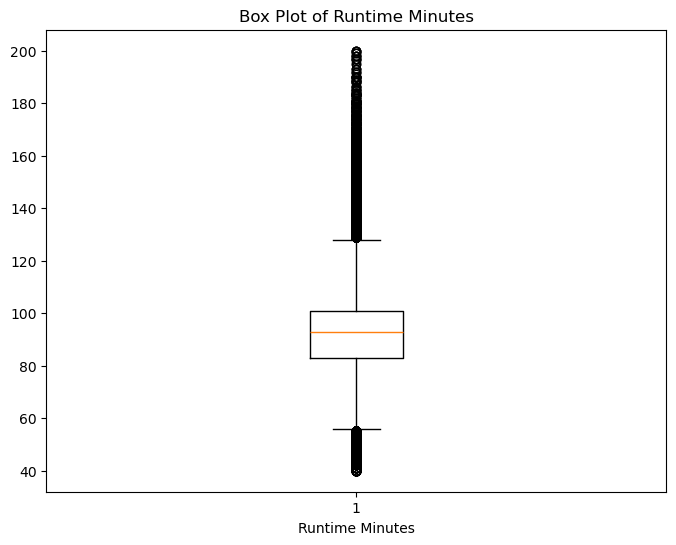

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(imdf['runtime_minutes'], vert=True)
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime Minutes')
plt.show()

In [19]:
imdf['genres'].value_counts().head()

genres
Drama           11546
Documentary      9179
Comedy           5155
Comedy,Drama     2502
Horror           2465
Name: count, dtype: int64

Creating binary columns (genre indicators) based on the unique genres in the `genres` column.

1. **Extract Unique Genres:**
   - Split the column into individual genres using `.str.split(',')` and then explode the resulting list to get unique genre values.

2. **Create Binary Columns:**
   - For each unique genre, check if that genre is present in the original column using `.str.contains(genre)`.
   - The result is converted to 1 (if the movie belongs to that genre) or 0 (otherwise).

In [20]:
unique_genres = imdf['genres'].str.split(',').explode().unique()

for genre in unique_genres:
    imdf[f'is_{genre}'] = imdf['genres'].str.contains(genre).astype(int)

- Convert the `averagerating` column to integer data type (removing any decimal places). To ensure that the ratings are represented as whole numbers (integers).

- The `.describe()` method provides summary statistics for the modified column. It includes count, mean, standard deviation, minimum, quartiles, and maximum.

In [21]:
imdf['averagerating'] = imdf['averagerating'].astype('int')
imdf['is_original_title'] = imdf['is_original_title'].astype('int')
imdf['numvotes'] = imdf['numvotes'].astype('int')
imdf[['averagerating', 'is_original_title', 'ordering', 'numvotes']].describe()

,averagerating,is_original_title,ordering,numvotes
count,69171.000000,69171.000000,69171.0,6.917100e+04
mean,5.863946,0.145234,1.0,3.755296e+03
std,1.484655,0.352339,0.0,3.128829e+04
min,1.000000,0.000000,1.0,5.000000e+00
25%,5.000000,0.000000,1.0,1.500000e+01
50%,6.000000,0.000000,1.0,5.400000e+01
75%,7.000000,0.000000,1.0,3.130000e+02
max,10.000000,1.000000,1.0,1.841066e+06


Permanently drop the columns `primary_title`, `original_title`, and `title` from the DataFrame.

In [22]:
imdf.drop(['movie_id', 'title', 'numvotes', 'genres', 'original_title', 'primary_title'], axis=1, inplace=True)

In [23]:
import pandas as pd

# Assuming your DataFrame is named 'imdf'
# First, select 1000 random entries
random_sample = imdf.sample(n=100, random_state=42)

# Next, save the random sample to a CSV file
random_sample.to_csv('im.csv', index=False)

print("Random sample saved to 'im.csv'")

Random sample saved to 'im.csv'


In [24]:
# Next, save the random sample to a CSV file
imdf.to_csv('./Data/imdf.csv', index=False)

print("Random sample saved to 'imdf'")

Random sample saved to 'imdf'


## `tn.movie_budgets.csv` DataFrame Cleaning

In [25]:
# Loading the dataframe
TN_df= pd.read_csv("./Data/tn.movie_budgets.csv", index_col= 0)

#### Initial Data Inspection

Getting a preview of the first 10 rows

In [26]:
TN_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Getting basic information about the whole dataset

In [27]:
TN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [28]:
TN_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [29]:
TN_df.shape

(5782, 5)

## Data wrangling

### Handling missing values

In [30]:
# Checking for missing values
TN_df.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in this dataframe

### Cleaning of the release date column.

In [31]:
# Getting a preview of the first 5 rows of the "release_date" column
TN_df["release_date"].head()

id
1    Dec 18, 2009
2    May 20, 2011
3     Jun 7, 2019
4     May 1, 2015
5    Dec 15, 2017
Name: release_date, dtype: object

For my analysis it would be more helpful to split this data into release month and release year.

In [32]:
# Converting the release_date column to datetime format
TN_df["release_date"] = pd.to_datetime(TN_df["release_date"])

# Creating new columns for "release_year" and "release_month" by splitting the "release_date" column
TN_df["release_year"]= TN_df["release_date"].dt.year
TN_df["release_month"]= TN_df["release_date"].dt.month

# Preview of the first 3 rows of the resulting  dataframe
TN_df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6


Now that we have split the release date in year and months we no longer have use for the release date column, hence we will drop it from the dataframe.

In [33]:
# Dropping the "release_date" column
TN_df = TN_df.drop(columns ="release_date", axis=1)
TN_df.head(3)

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6


### Cleaning the movie column

Checking to see if there are duplicates. All the values in the "movie" column should be unique.

In [34]:
# Getting info about the movie column
TN_df["movie"].describe()

count     5782
unique    5698
top       Home
freq         3
Name: movie, dtype: object

The number of unique values not being equal to the total count of values shows that there are some duplicates in the movie column. The difference between the total counts and the unique values shows that there are 84 duplicated values. Below we check for duplicates and drop rows where the movie column has duplicate values.

In [35]:
# Creating a dataframe that combines rows where the movie column has duplicate values in the TN_df dataframe.

duplicate_movies = TN_df[TN_df.duplicated(subset='movie')]

# Getting a preview of the duplicated rows

duplicate_movies.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
74,Godzilla,"$125,000,000","$136,314,294","$376,000,000",1998,5
9,Robin Hood,"$99,000,000","$30,824,628","$84,747,441",2018,11
85,Fantastic Four,"$87,500,000","$154,696,080","$333,132,750",2005,7
44,The Mummy,"$80,000,000","$155,385,488","$416,385,488",1999,5
8,Hercules,"$70,000,000","$99,112,101","$250,700,000",1997,6


In [36]:
# Dropping rows where the movie column has duplicated values.

TN_df = TN_df.drop_duplicates(subset = ['movie'])

# Check if the changes have been implemented the new number of rows should now be 5698

TN_df.shape

(5698, 6)

### Cleaning the production_budget, domestic_gross and world_wide gross columns

These columns represent financial figures thus it is important that we work with them in integer or float format to allow us to carry out mathematical functions on them.

In [37]:
# Checking their datatypes
TN_df.dtypes

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
release_year          int32
release_month         int32
dtype: object

Since the three columns have object data types, we will convert them into integer format.

In [38]:
# Removing the commas and dollar signs from the columns

TN_df['production_budget'] = TN_df['production_budget'].replace('[\$,]','', regex=True)
TN_df['worldwide_gross'] = TN_df['worldwide_gross'].replace('[\$,]','', regex=True)
TN_df['domestic_gross'] = TN_df['domestic_gross'].replace('[\$,]','', regex=True)

# Converting the columns into integers
TN_df['production_budget'] = TN_df['production_budget'].astype("int64")
TN_df['worldwide_gross'] = TN_df['worldwide_gross'].astype("int64")
TN_df['domestic_gross'] = TN_df['domestic_gross'].astype("int64")

# Previewing the results, looking at the first 3 rows
TN_df.head(3)

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
1,Avatar,425000000,760507625,2776345279,2009,12
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
3,Dark Phoenix,350000000,42762350,149762350,2019,6


The data showing that there were movies that did not generate any revenue at all could be a sign that data was entered incorrectly. Hence we shall drop all rows where the world_wide gross is 0.

In [39]:
# Retaining rows where the values in the world_wide gross is greater than zero
TN_df = TN_df[TN_df['worldwide_gross'] > 0]

# checking that the zero values have been dropped.
assert (TN_df['worldwide_gross'] == 0).sum() == 0

Creating a profit column to allow us to access the profitability of each movie.

In [40]:
# Creating a profit column by subtracting the  production_budget from the worldwide_gross
TN_df["profit"] = (TN_df['worldwide_gross'] - TN_df['production_budget'])

# preview of the resultant dataframe
TN_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit
id,,,,,,,
1,Avatar,425000000,760507625,2776345279,2009,12,2351345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,635063875
3,Dark Phoenix,350000000,42762350,149762350,2019,6,-200237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1072413963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,999721747


In [41]:
# Next, save the random sample to a CSV file
TN_df.to_csv('./Data/TN_df.csv', index=False)

print("Random sample saved to 'TN_df'")

Random sample saved to 'TN_df'


# `bom.movie_gross` Data Cleaning

In [42]:
import pandas as pd
import numpy as np
import os

In [43]:
bomdf.shape

(3387, 5)

In [44]:
bomdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [45]:
bomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [46]:
bomdf.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [47]:
missing_values = bomdf.isnull().sum() / len(bomdf) * 100
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


In [48]:
# Count the number of NaN values
nan_count = bomdf['foreign_gross'].isna().sum()
print(f"Number of NaN values in 'foreign_gross': {nan_count}")

# Replace NaN values with 0
bomdf['foreign_gross'] = bomdf['foreign_gross'].fillna(0)

# Convert the column to numeric type before interpolating
bomdf['foreign_gross'] = pd.to_numeric(bomdf['foreign_gross'], errors='coerce')
bomdf['foreign_gross'] = bomdf['foreign_gross'].interpolate(method='linear')
bomdf['foreign_gross'] = bomdf['foreign_gross'].astype('int')

Number of NaN values in 'foreign_gross': 1350


In [49]:
def drop_columns_with_missing_values(df, threshold=0.1):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean()
    
    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percent[missing_percent >= threshold].index
    
    # Drop the columns
    cleaned_df = df.drop(columns=columns_to_drop)
    
    return cleaned_df

bomdf = drop_columns_with_missing_values(bomdf, threshold=0.1)

In [50]:
missing_values = bomdf.isnull().sum() / len(bomdf) * 100
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 title             0.000000
studio            0.147623
domestic_gross    0.826690
foreign_gross     0.000000
year              0.000000
dtype: float64


In [51]:
def impute_missing_values(df):
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Impute numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
bomdf = impute_missing_values(bomdf)

In [52]:
missing_values = bomdf.isnull().sum() / len(bomdf) * 100
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64


In [53]:
bomdf['domestic_gross'] = bomdf['domestic_gross'].astype('int')

In [54]:
bomdf['domestic_gross'].describe()

count    3.387000e+03
mean     2.874585e+07
std      6.670497e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.874584e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

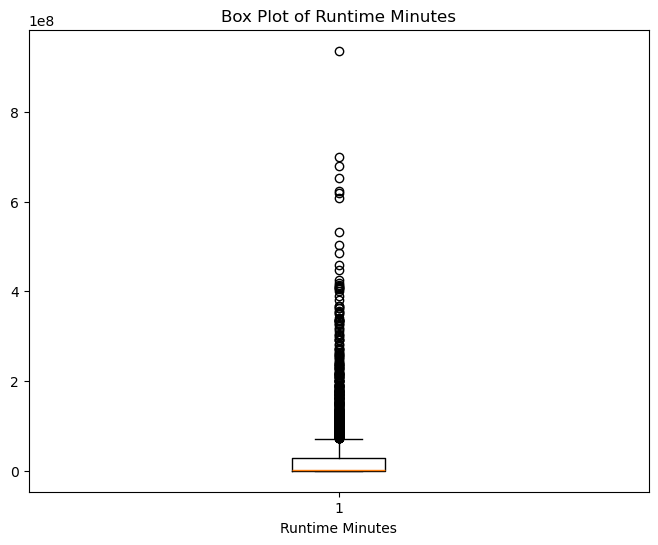

In [55]:
plt.figure(figsize=(8, 6))
plt.boxplot(bomdf['domestic_gross'], vert=True)
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime Minutes')
plt.show()

In [56]:
bomdf.sort_values(by='domestic_gross', ascending=True).head()

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100,0,2013
2757,Satanic,Magn.,300,0,2016
2756,News From Planet Mars,KL,300,0,2016
2321,The Chambermaid,FM,300,0,2015
1018,Apartment 143,Magn.,400,426000,2012


In [57]:
bomdf.sort_values(by='domestic_gross', ascending=True).tail()

,title,studio,domestic_gross,foreign_gross,year
727,Marvel's The Avengers,BV,623400000,895500000,2012
1873,Jurassic World,Uni.,652300000,473200000,2015
3079,Avengers: Infinity War,BV,678800000,323450000,2018
3080,Black Panther,BV,700100000,646900000,2018
1872,Star Wars: The Force Awakens,BV,936700000,236600000,2015


In [58]:
# Create a dictionary to map abbreviations to full names
studio_mapping = {
    'ifc': 'IFC Films',
    'uni.': 'Universal Pictures',
    'wb': 'Warner Bros',
    'magn.': 'Magnolia Pictures',
    'fox': '20th Century Fox',
    'spc': 'Sony Pictures Classics',
    'sony': 'Sony Pictures',
    'bv': 'Buena Vista (Disney)',
    'lgf': 'Lionsgate Films',
    'par.': 'Paramount Pictures',
    'eros': 'Eros International',
    'wein.': 'The Weinstein Company',
    'cl': 'Columbia Pictures',
    'strand': 'Strand Releasing',
    'foxs': 'Fox Searchlight Pictures',
    'ratt.': 'Rattapallax Films',
    'focus': 'Focus Features',
    'wgusa': 'Well Go USA Entertainment',
    'cj': 'CJ Entertainment',
    'mbox': 'Music Box Films',
    'utv': 'UTV Motion Pictures',
    'a24': 'A24',
    'wb (nl)': 'Warner Bros (Netherlands)',
    'lg/s': 'Lionsgate Entertainment',
    'cohen': 'Cohen Media Group',
    'orf': 'Open Road Films',
    'rela.': 'Relativity Media',
    'sgem': 'Samuel Goldwyn Films',
    'fip': 'FilmDistrict',
    'gold.': 'Gold Circle Films',
    'gk': 'GKIDS',
    'stx': 'STX Entertainment',
    'tris': 'TriStar Pictures',
    'osci.': 'Oscilloscope Laboratories',
    'rtwc': 'Roadside Attractions',
    'mne': 'Mongrel Media',
    'bst': 'Bleecker Street',
    'eone': 'Entertainment One',
    'drft.': 'Draft House Films',
    'distrib.': 'Not Specified',
    'relbig.': 'Reliance Big Pictures',
    'anch.': 'Anchor Bay Films',
    'cbs': 'CBS Films',
    'zeit.': 'Zeitgeist Films',
    'bg': 'Bodega Films',
    'sum.': 'Summit Entertainment',
    'w/dim.': 'Walt Disney Studios Motion Pictures',
    'fd': 'FilmDistrict',
    'trib.': 'Not Specified',
    'yash': 'Yash Raj Films',
    'orch.': 'Orchard',
    'frun': 'Not Specified',
    'fun': 'Not Specified',
    'fcw': 'Not Specified',
    'free': 'Not Specified',
    'lorb.': 'Not Specified',
    'pnt': 'Not Specified',
    'elev.': 'Not Specified',
    'Orchard': 'The Orchard',
    'scre.': 'Screen Gems',
    'cgld': 'Cinedigm',
    'vari.': 'Variety',
    'abr.': 'Abramorama',
    'p/dw': 'Paramount/DreamWorks',
    'fathom': 'Fathom Events',
    'fr': 'FilmRise',
    've': 'Vertical Entertainment',
    'kino': 'Kino Lorber',
    'good deed': 'Good Deed Entertainment',
    'grtindia': 'GRT India',
    'hc': 'Not Specified',
    'jampa': 'Jampa Films',
    'linn': 'Linn Productions',
    'trafalgar': 'Trafalgar Releasing',
    'scre.': 'Screen Gems',
    'cgld': 'Cinedigm',
    'vari.': 'Variety',
    'abr.': 'Abramorama',
    'p/dw': 'Paramount',
    'fathom': 'Fathom Events',
    'fr': 'FilmRise',
    've': 'Vertical Entertainment',
    'kino': 'Kino Lorber',
    'dreamwest': 'Dreamwest Films',
    'cleopatra': 'Cleopatra Entertainment',
    'app.': 'Not Specified',
    'saban': 'Saban Films',
    'mpft': 'Not Specified',
    'am': 'Not Specified',
    'kc': 'Not Specified',
    'libre': 'Libre Entertainment',
}

# Convert the 'studio' column to lowercase
bomdf['studio'] = bomdf['studio'].str.lower()

# Replace the studio names in the 'studio' column
bomdf['studio'] = bomdf['studio'].replace(studio_mapping)

# Check the value counts again
print(bomdf['studio'].value_counts().head())

studio
IFC Films             171
Universal Pictures    147
Warner Bros           140
20th Century Fox      136
Magnolia Pictures     136
Name: count, dtype: int64


In [59]:
bomdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista (Disney),415000000,652000000,2010
1,Alice in Wonderland (2010),Buena Vista (Disney),334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,Warner Bros,296000000,664300000,2010
3,Inception,Warner Bros,292600000,535700000,2010
4,Shrek Forever After,Paramount,238700000,513900000,2010


In [60]:
# Next, save the random sample to a CSV file
bomdf.to_csv('./Data/bomdf.csv', index=False)

print("Random sample saved to 'bomdf'")

Random sample saved to 'bomdf'


## `rt.movie_info.tsv` Data Cleaning

In [61]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Loading the database
rtmdf = pd.read_csv('./Data/rt.movie_info.tsv', sep= '\t', index_col=0)

In [63]:
# Cchecking the dataset's first and last five rows
rtmdf.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [64]:
rtmdf.info() #Checking the data types of columns

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [65]:
# Assuming rtmdf is your DataFrame
rtmdf[['director', 'writer']] = rtmdf[['director', 'writer']].fillna('Other')

# Verify the changes
print(rtmdf[['director', 'writer']].isnull().sum())

director    0
writer      0
dtype: int64


In [66]:
rtmdf.isnull().sum() / len(rtmdf) *  100

synopsis         3.974359
rating           0.192308
genre            0.512821
director         0.000000
writer           0.000000
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

In [67]:
def drop_columns_with_missing_values(df, threshold=0.10):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean()
    
    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percent[missing_percent >= threshold].index
    
    # Drop the columns
    cleaned_df = df.drop(columns=columns_to_drop)
    
    return cleaned_df

rtmdf = drop_columns_with_missing_values(rtmdf, threshold=0.10)

In [68]:
import pandas as pd

def impute_missing_values(df):
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Impute numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
rtmdf = impute_missing_values(rtmdf)

In [69]:
rtmdf.isnull().sum() / len(rtmdf) *  100

synopsis    0.0
rating      0.0
genre       0.0
director    0.0
writer      0.0
runtime     0.0
dtype: float64

In [70]:
rtmdf = rtmdf.drop(columns='synopsis')

In [71]:
# Replace 'NR' with 'Not Rated' and 'NC17' with 'NC-17'
rtmdf['rating'] = rtmdf['rating'].replace({'NR': 'Not Rated', 'NC17': 'NC-17'})

In [72]:
rtmdf['rating'].value_counts()

rating
R            524
Not Rated    503
PG           240
PG-13        235
G             57
NC-17          1
Name: count, dtype: int64

In [73]:
# First we replace and with pipe symbol then split the genres using pipe symbol delimeter.
unique_genres = rtmdf['genre'].str.replace(' and ', '|').str.split('|').explode().unique()

# Iterate over the unique genres and create new binary columns.
for genre in unique_genres:
    rtmdf[f'is_{genre}'] = rtmdf['genre'].str.contains(genre).astype(int)

In [74]:
rtmdf.columns

Index(['rating', 'genre', 'director', 'writer', 'runtime', 'is_Action',
       'is_Adventure', 'is_Classics', 'is_Drama', 'is_Science Fiction',
       'is_Fantasy', 'is_Musical', 'is_Performing Arts', 'is_Mystery',
       'is_Suspense', 'is_Romance', 'is_Kids', 'is_Family', 'is_Comedy',
       'is_Documentary', 'is_Special Interest', 'is_Art House',
       'is_International', 'is_Horror', 'is_Western', 'is_Television',
       'is_Sports', 'is_Fitness', 'is_Animation', 'is_Faith',
       'is_Spirituality', 'is_Cult Movies', 'is_Anime', 'is_Manga', 'is_Gay',
       'is_Lesbian'],
      dtype='object')

In [75]:
rtmdf['runtime'].head()

id
1    104 minutes
3    108 minutes
5    116 minutes
6    128 minutes
7    200 minutes
Name: runtime, dtype: object

In [76]:
# Remove the word 'minutes' and convert to integer
rtmdf['runtime'] = rtmdf['runtime'].str.replace(' minutes', '').astype(int)
rtmdf['runtime'].head()

id
1    104
3    108
5    116
6    128
7    200
Name: runtime, dtype: int64

In [77]:
# Filtering to a range of 40 to 200 minute
rtmdf = rtmdf[(rtmdf['runtime'] >= 40) & (rtmdf['runtime'] <= 200)]

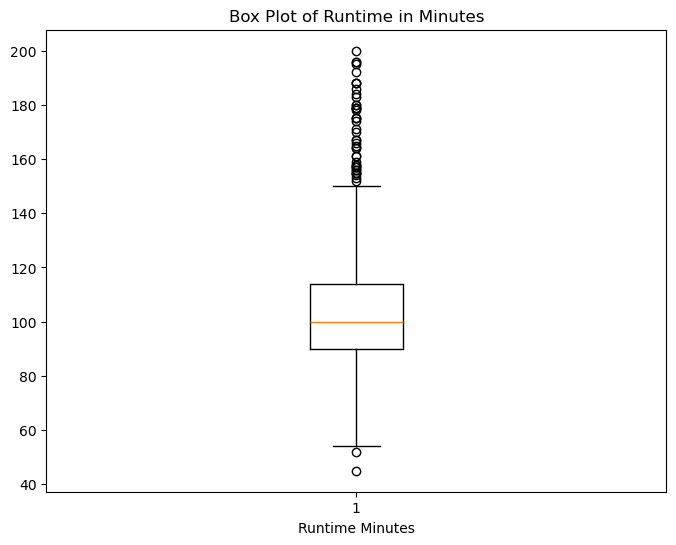

In [78]:
plt.figure(figsize=(8, 6))
plt.boxplot(rtmdf['runtime'])
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime in Minutes')
plt.show()

## Merge the DataFrames

In [79]:
# Rename columns for consistency
imdf.rename(columns={'start_year': 'year'}, inplace=True)
TN_df.rename(columns={'release_year': 'year'}, inplace=True)

In [80]:
imdf.columns

Index(['year', 'runtime_minutes', 'averagerating', 'ordering',
       'is_original_title', 'is_Action', 'is_Crime', 'is_Drama',
       'is_Biography', 'is_Comedy', 'is_Fantasy', 'is_Horror', 'is_Thriller',
       'is_Adventure', 'is_Animation', 'is_History', 'is_Documentary',
       'is_Mystery', 'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War',
       'is_Music', 'is_Sport', 'is_Western', 'is_Musical', 'is_News',
       'is_Reality-TV', 'is_Game-Show', 'is_Adult'],
      dtype='object')

In [81]:
TN_df.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'year', 'release_month', 'profit'],
      dtype='object')

In [82]:
bomdf.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [83]:
import sqlite3

# Create a SQLite database
conn1 = sqlite3.connect('movies.db')

# Write DataFrames to SQL tables
imdf.to_sql('imdf', conn, if_exists='replace', index=False)
TN_df.to_sql('TN_df', conn, if_exists='replace', index=False)
bomdf.to_sql('bomdf', conn, if_exists='replace', index=False)

3387

In [84]:
# Performing SQL merge
query = """
    SELECT *
    FROM imdf
    JOIN TN_df ON imdf.year = TN_df.year
    JOIN bomdf ON imdf.year = bomdf.year
    LIMIT 5
"""
df = pd.read_sql_query(query, conn1)
df.head()

,movie_id,primary_title,original_title,year,runtime_minutes,averagerating,ordering,is_original_title,is_Action,is_Crime,...,production_budget,domestic_gross,worldwide_gross,year,release_month,profit,title,studio,domestic_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7,1,0,1,1,...,20000000,56671993,181025343,2013,10,161025343,12 Years a Slave,Fox Searchlight Pictures,56700000,2013
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,7,1,0,1,1,...,20000000,56671993,181025343,2013,10,161025343,2 Guns,Universal Pictures,75600000,2013
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,7,1,0,1,1,...,20000000,56671993,181025343,2013,10,161025343,20 Feet from Stardom,Roadside Attractions,4900000,2013
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,7,1,0,1,1,...,20000000,56671993,181025343,2013,10,161025343,21 and Over,Relativity Media,25700000,2013
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,7,1,0,1,1,...,20000000,56671993,181025343,2013,10,161025343,22 Bullets,cdgm.,28745845,2013


In [85]:
# Next, save the random sample to a CSV file
df.to_csv('./Data/mergeddf.csv', index=False)

print("Random sample saved to 'mergedf'")

Random sample saved to 'mergedf'


# Exploratory Data Analysis

In this section, we perform Exploratory Data Analysis (EDA) to summarize and visualize the main characteristics of our datasets. This process will helps us uncover patterns, spot anomalies, test hypotheses, and check assumptions using various statistical graphics and data visualization methods. By employing summary statistics and visual tools like histograms, scatter plots, box plots, and heat maps, we aim to understand the underlying structure of the data and identify relationships between variables, which will help us provide the investor with insights.


## Univariate Analysis

In the Univariate Analysis section, we focus on examining the statistical properties of individual variables in our dataset. By analyzing one variable at a time, we can identify patterns, detect outliers, and gain a clear understanding of each variable's behavior, which is essential for accurate data interpretation and further analysis.

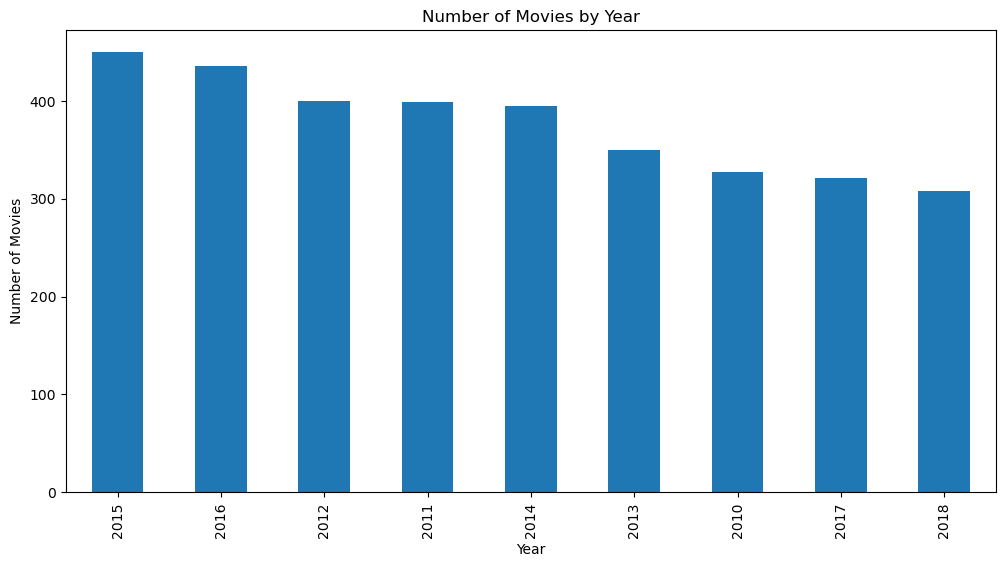

In [86]:
#Number of movies by year
bomdf['year'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.show()

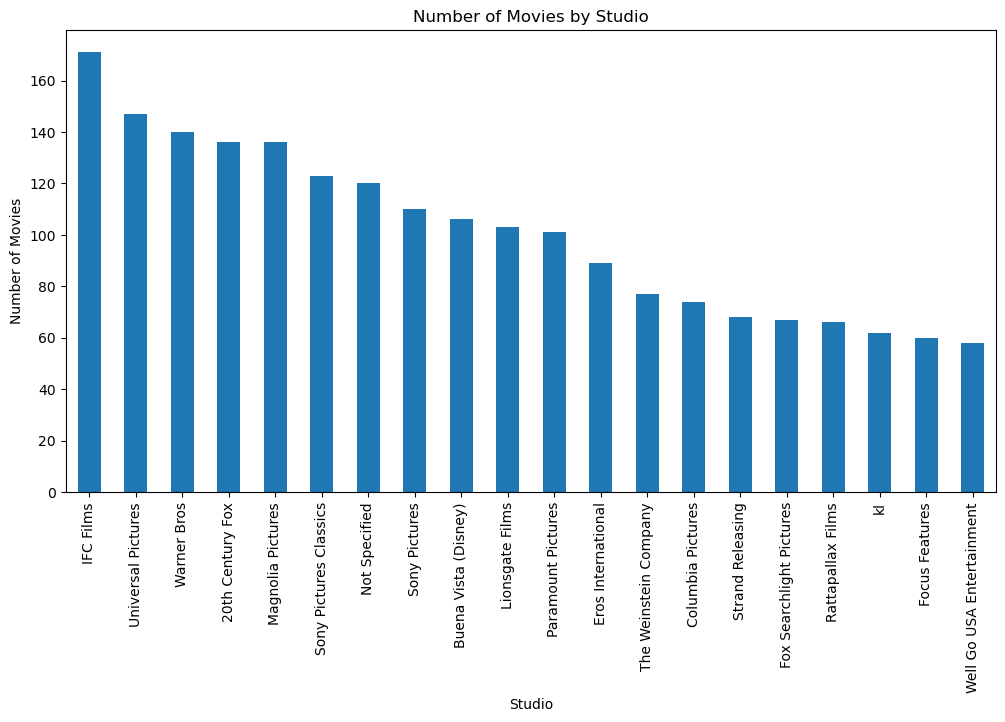

In [87]:
# Number of movies by studio
top_20_studios = bomdf['studio'].value_counts().nlargest(20)
top_20_studios.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Studio')
plt.show()

### 1. Distribution of Average Rating

- The distribution of average ratings shows how movies are rated by viewers. This can help identify the overall quality perception of movies in the dataset.
- Average ratings are a crucial metric for understanding audience satisfaction and movie success.
1. **Quality Benchmark**: Knowing the distribution of ratings helps establish a benchmark for the quality of movies the company should aim for. E.g an average 6 rating is the mode hence the threshold performance
2. **Genre Preferences**: Certain genres might consistently receive higher ratings, indicating stronger audience preferences.
3. **Improvement Areas**: Identifying genres or types of movies with lower average ratings can highlight areas for improvement or innovation.
4. **Quality Goals**: Aim for an average rating that aligns with successful movies to ensure high audience satisfaction.
5. **Genre Targeting**: Identify and focus on genres that consistently receive higher ratings and are more popular among audiences.


/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


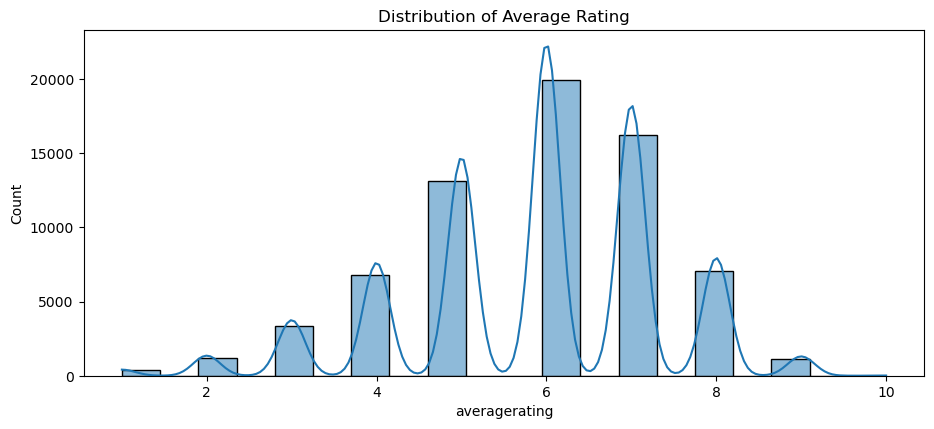

In [88]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 8))

# Distribution of averagerating
plt.subplot(2, 2, 3)
sns.histplot(imdf['averagerating'].dropna(), kde=True, bins=20)
plt.title('Distribution of Average Rating')

plt.tight_layout()
plt.show()

### Histogram plot for top ten directors.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


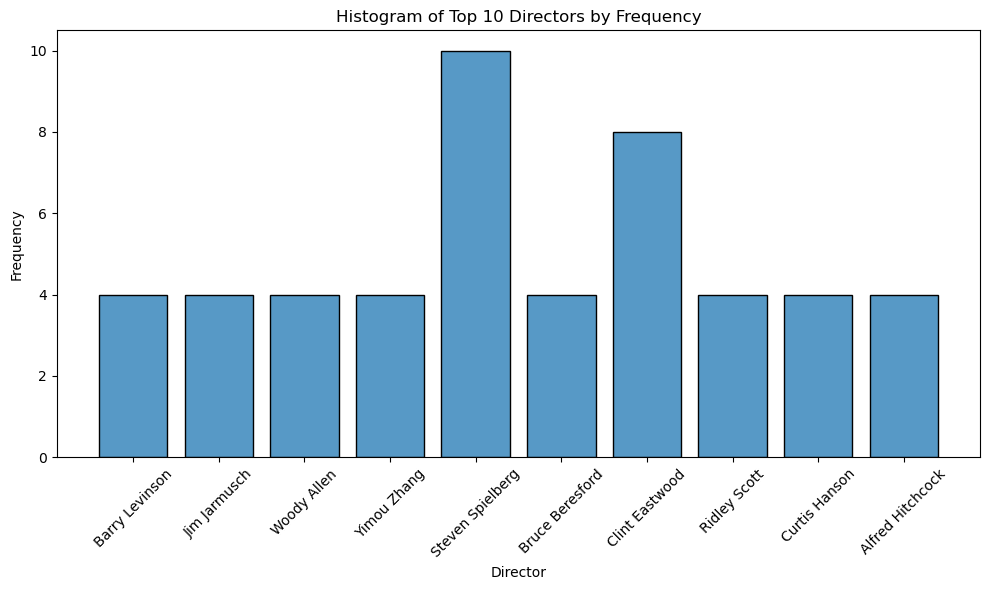

In [89]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 directors, excluding 'Other'
top_10_directors = rtmdf['director'].value_counts().head(11).index
top_10_directors = top_10_directors[top_10_directors != 'Other']

# Filter the DataFrame to include only the top 10 directors
top_10_df = rtmdf[rtmdf['director'].isin(top_10_directors)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=top_10_df, x='director', shrink=.8)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.title('Histogram of Top 10 Directors by Frequency')
plt.tight_layout()
plt.show()

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


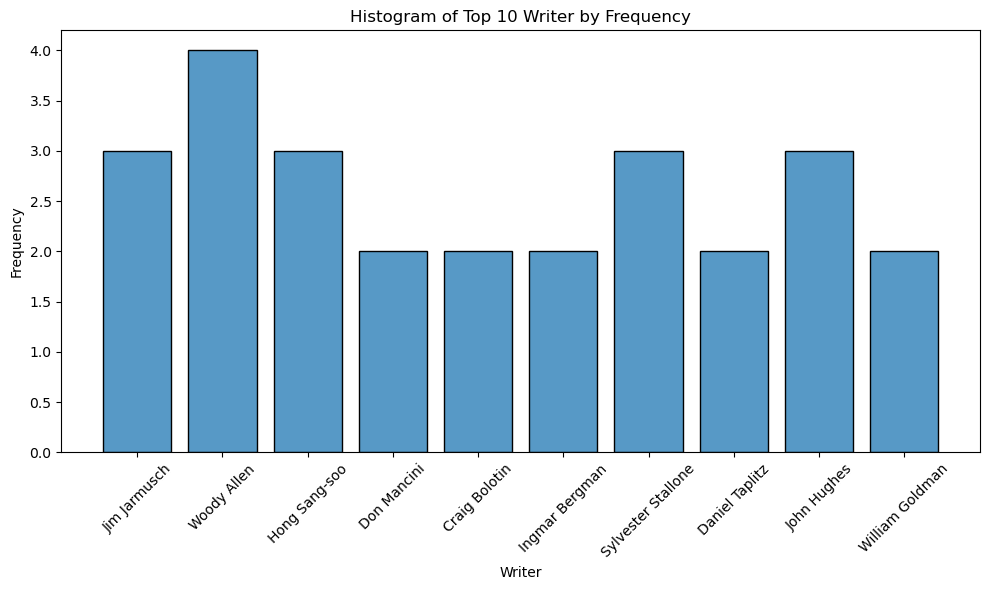

In [90]:
# Get the top 10 directors, excluding 'Other'
top_10_writers = rtmdf['writer'].value_counts().head(11).index
top_10_writers = top_10_writers[top_10_writers != 'Other']

# Filter the DataFrame to include only the top 10 directors
top_10_df = rtmdf[rtmdf['writer'].isin(top_10_writers)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=top_10_df, x='writer', shrink=.8)
plt.xticks(rotation=45)
plt.xlabel('Writer')
plt.ylabel('Frequency')
plt.title('Histogram of Top 10 Writer by Frequency')
plt.tight_layout()
plt.show()

### Production budget<br>
A univariate analysis of the production budget will help provide a clear picture of the budget distribution within the film industry.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


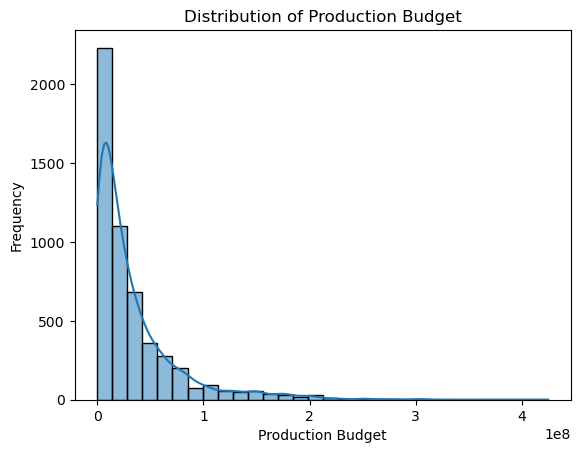

In [91]:
# Histogram
sns.histplot(TN_df['production_budget'], bins=30, kde=True)
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency');

# Bivariate analysis

The Bivariate Analysis section investigates the relationships between pairs of variables exploring how the two variables interact with each other. This analysis helps us uncover associations, trends, and dependencies that might exist between variables.

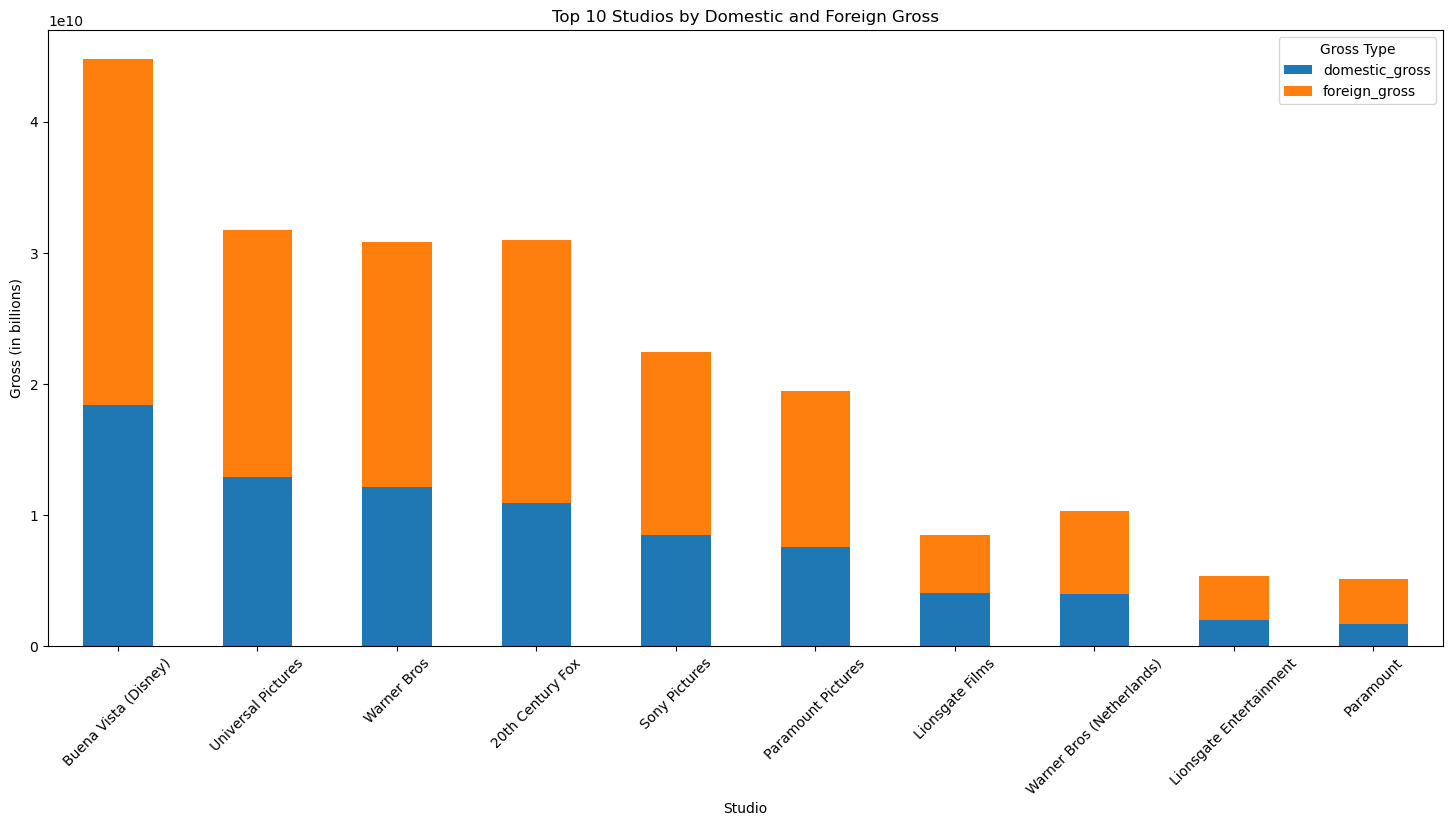

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zeros in domestic and foreign gross
filtered_data = bomdf[(bomdf['domestic_gross'] != 0) & (bomdf['foreign_gross'] != 0)]

# Group by studio and calculate the sum of domestic and foreign gross
studio_gross = filtered_data.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Sort by domestic and foreign gross and select the top 10 studios
top_studios = studio_gross.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
top_studios.plot(kind='bar', stacked=True, ax=ax)

# Labeling
plt.title('Top 10 Studios by Domestic and Foreign Gross')
plt.xlabel('Studio')
plt.ylabel('Gross (in billions)')
plt.xticks(rotation=45)
plt.legend(title='Gross Type')
plt.show();

### Average Rating by Genre

Analyzing the performance of each genre based on the average ratings:

1. **Documentary**: This genre has the highest median rating, indicating that it tends to receive favorable ratings from viewers.

2. **Drama** and **Biography**: They have relatively high median rating, suggesting consistent positive reception.

3. **Comedy**, **Fantasy**, **Adventure**, **Sci-Fi**, and **Action**: These genres have wider boxes, indicating mixed ratings.

4. **Crime**, **Romance**, **Mystery**, and **Family**: These genres have moderate median ratings.

5.  **Comedy**, **Fantasy**, **Adventure**, **Sci-Fi**, **Action**, **Music**, **Sport**, and **Western**: These genres show variability in ratings.

6. **Thriller**, **History**, **Reality-TV**, and **Game Show**: These genres have relatively low median ratings.

7. **Horror**: Horror has the lowest median rating, suggesting it's the least popular genre in terms of viewer ratings.

> The best-performing genre is Documentary, while Horror is the least favored.

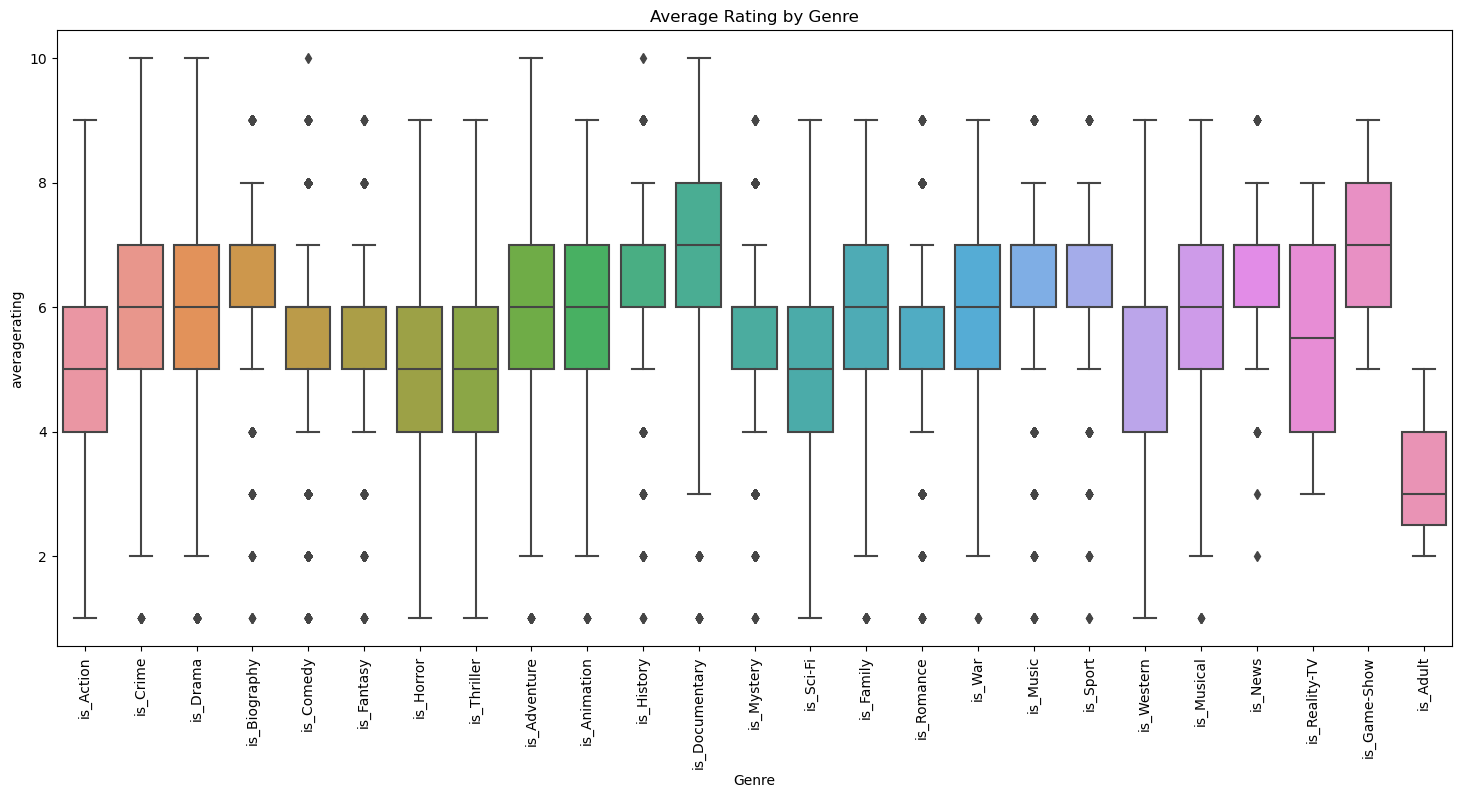

In [93]:
# Input data
data = imdf

# List of genre columns
genre_columns = [
    'is_Action', 'is_Crime', 'is_Drama', 'is_Biography', 'is_Comedy',
    'is_Fantasy', 'is_Horror', 'is_Thriller', 'is_Adventure',
    'is_Animation', 'is_History', 'is_Documentary', 'is_Mystery',
    'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War', 'is_Music',
    'is_Sport', 'is_Western', 'is_Musical', 'is_News', 'is_Reality-TV',
    'is_Game-Show', 'is_Adult'
]

# Melt the DataFrame to long format for seaborn
data_melted = data.melt(id_vars=['averagerating'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')

# # Filter out rows where Is_Genre is 0
data_melted = data_melted[data_melted['Is_Genre'] == 1]

# Plot the average ratings for each genre
plt.figure(figsize=(18, 8))
sns.boxplot(x='Genre', y='averagerating', data=data_melted)
plt.xticks(rotation=90)
plt.title('Average Rating by Genre')
plt.show()

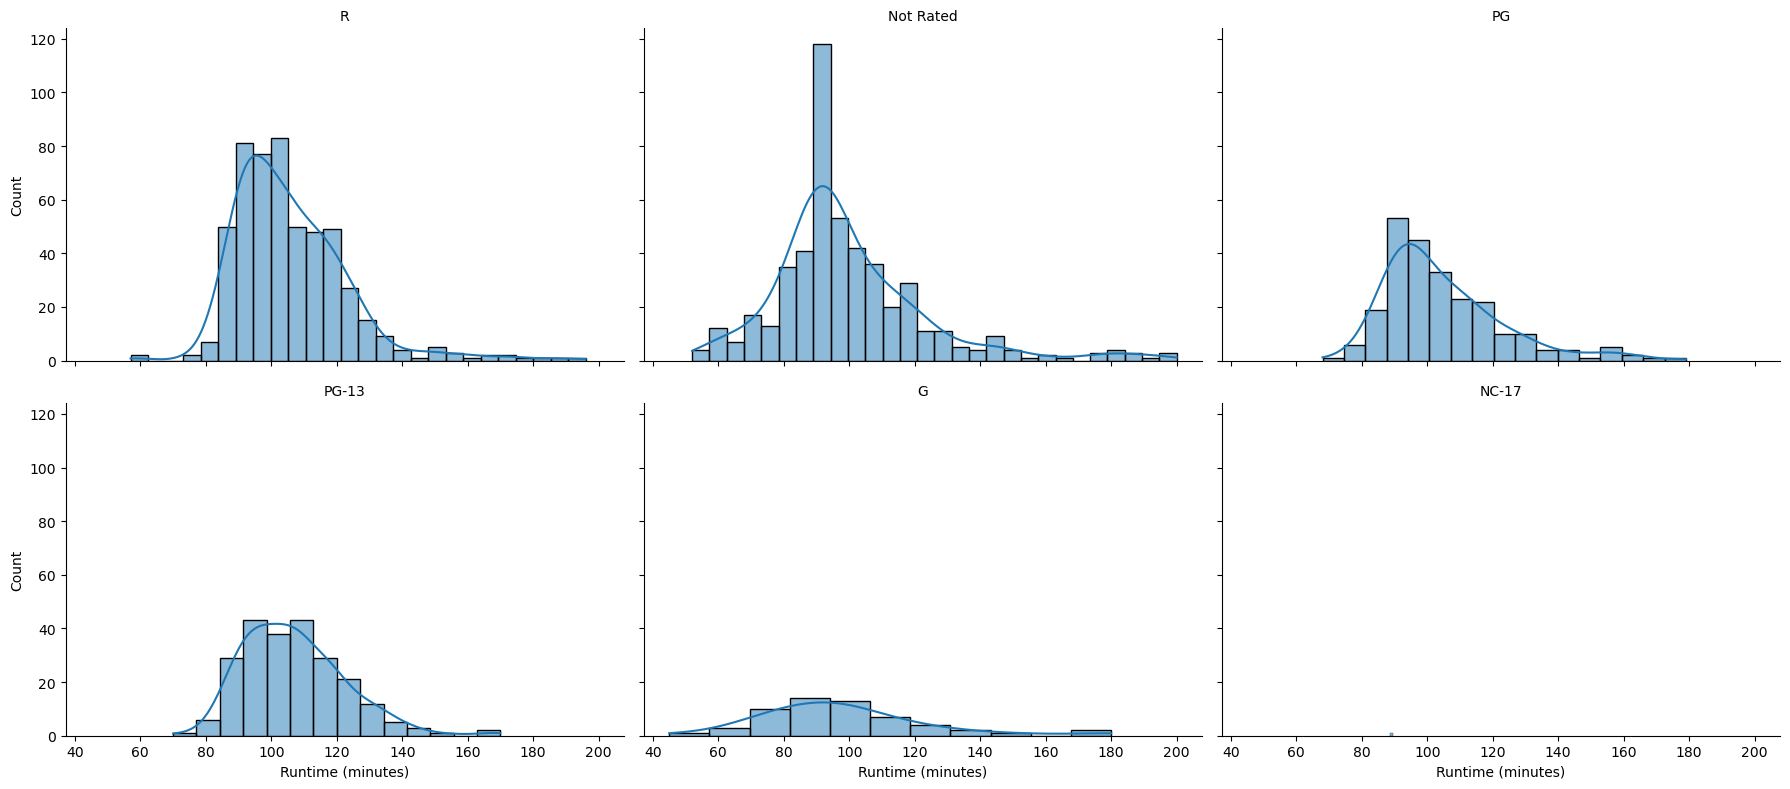

In [94]:
# import the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Replace infinite values with NaN
rtmdf.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create Facet Grid
g = sns.FacetGrid(rtmdf, col='rating', col_wrap=3, height=4, aspect=1.5)
g.map(sns.histplot, 'runtime', kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Runtime (minutes)', 'Count')
plt.show()

# Re-enable warnings if needed
warnings.filterwarnings('default', category=FutureWarning)

### Production Budget vs Profit<br>
This analysis directly shows how investment (budget) translates into financial returns (profit), and will help inform future budget allocation decisions.

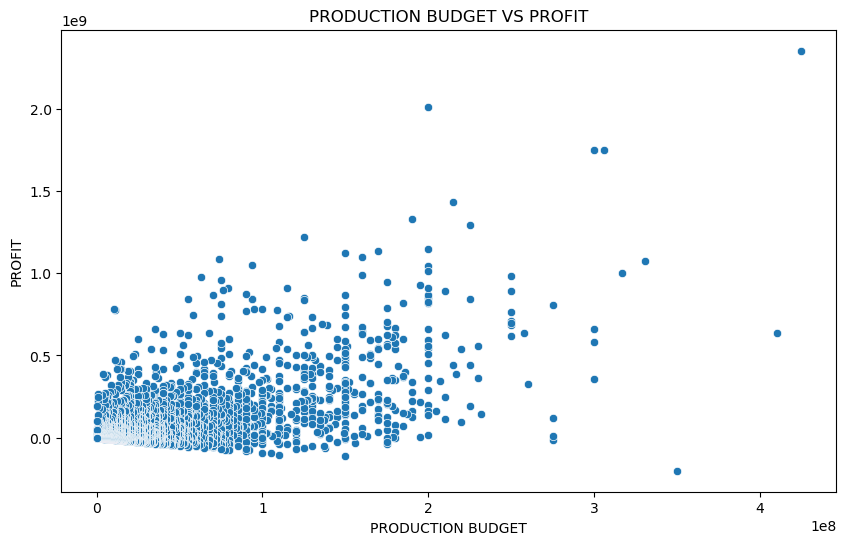

In [95]:
# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data=TN_df)
plt.title('PRODUCTION BUDGET VS PROFIT')
plt.xlabel('PRODUCTION BUDGET')
plt.ylabel('PROFIT');

# Displaying the plot
plt.show()

From the plot you can see that as the production budget increases the profit tends to increase as well. As the budget continues to increase, the frequency  declines, showing that High-budget productions are much less common.

# Release month vs profit

This analysis may help investors make informed decisions about when to release films for potential profit maximization.

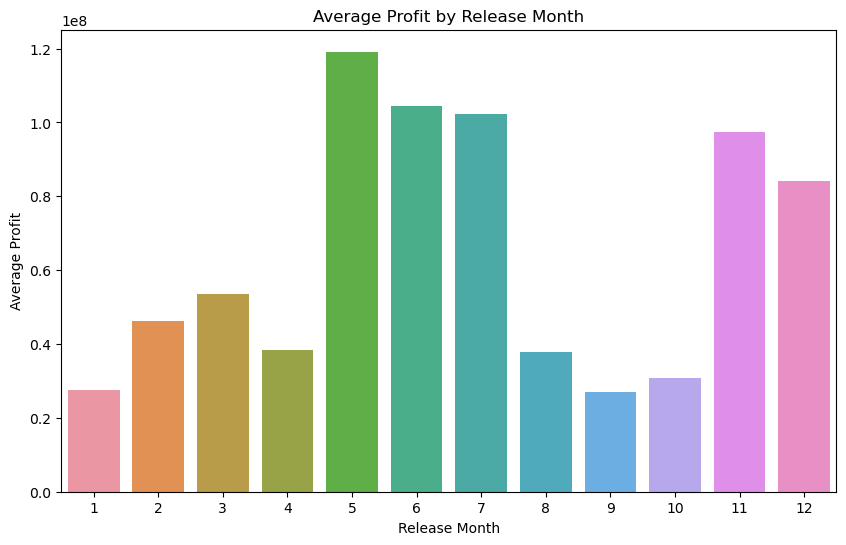

In [96]:
# Aggregating profit by release month
monthly_profit = TN_df.groupby('release_month')['profit'].mean().reset_index()

# Plotting the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='release_month', y='profit', data=monthly_profit,)
plt.title('Average Profit by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')

# Displaying the plot
plt.show()


The highest average profits appear to be in months 5 (May), 6 (June), and 7 (July), with May being the peak. This suggests that summer releases tend to be more profitable on average.
There are noticeable increases in months 11 (November) and 12 (December), indicating higher profitability during the holiday season.

# Mulitivariate analysis

In the Multivariate Analysis section, we extend our examination to more than two variables simultaneously. This comprehensive approach  provides deeper insights into the complex structure of our data, helping us identify patterns, correlations, and underlying factors that are crucial for building robust and accurate predictive models.

### Correlation Matrix of Domestic Gross, Foreign Gross and Year

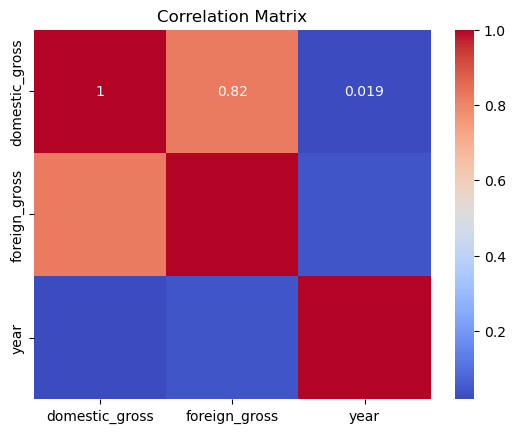

In [97]:
#Correlation analysis
corr = bomdf[['domestic_gross', 'foreign_gross', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Create a Correlation Matrix Heatmap of Movie Genres.

1. **Strong Positive Correlations**:
   - **Adventure and Action**: These genres have a strong positive correlation, indicating that movies labeled as 'Adventure' are often also labeled as 'Action'.
   - **Comedy and Romance**: These genres also show a strong positive correlation, suggesting that romantic comedies are a common genre combination.

2. **Strong Negative Correlations**:
   - **Documentary and most other genres**: The 'Documentary' genre has low or negative correlations with most other genres, indicating that documentaries are less likely to be classified under multiple genres simultaneously.

3. **Neutral or Weak Correlations**:
   - **Animation and other genres**: The 'Animation' genre shows weak correlations with other genres, suggesting that animated movies are often distinct in their classification.

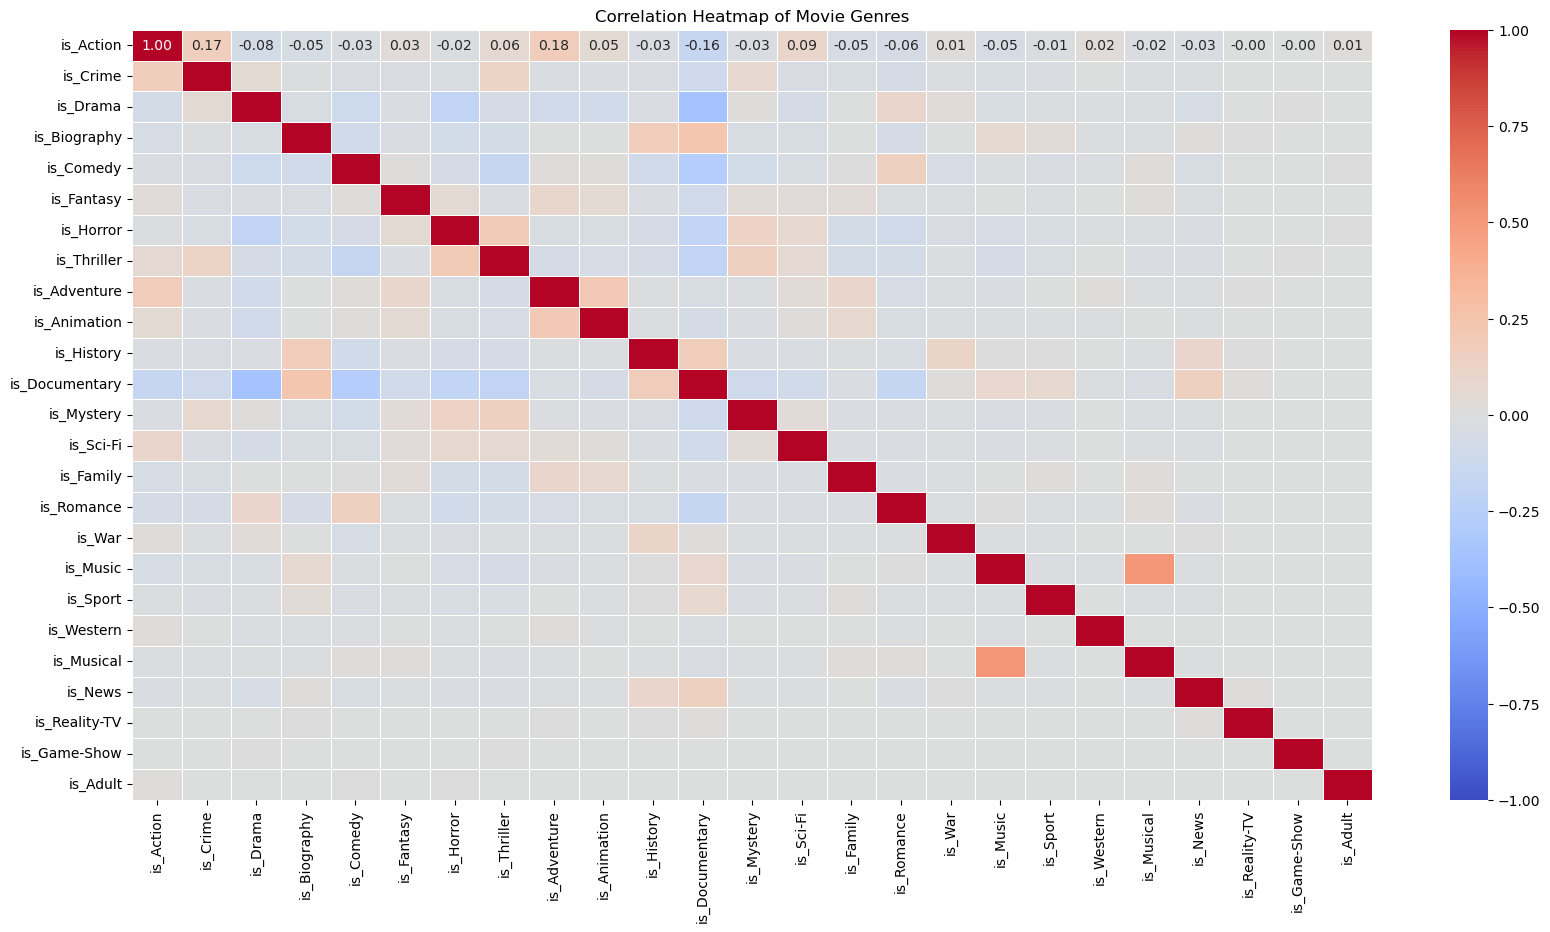

In [98]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the columns of interest
columns_of_interest = ['is_Action', 'is_Crime', 'is_Drama', 'is_Biography', 'is_Comedy',
    'is_Fantasy', 'is_Horror', 'is_Thriller', 'is_Adventure',
    'is_Animation', 'is_History', 'is_Documentary', 'is_Mystery',
    'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War', 'is_Music',
    'is_Sport', 'is_Western', 'is_Musical', 'is_News', 'is_Reality-TV',
    'is_Game-Show', 'is_Adult']

# Creating a subset of the DataFrame with the specified columns
Heatmap_df = imdf[columns_of_interest]

# Computing the correlation matrix
correlation_matrix = Heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Movie Genres')
plt.show()

### Correlation Heatmap of Movie Ratings, Runtimes and Genres

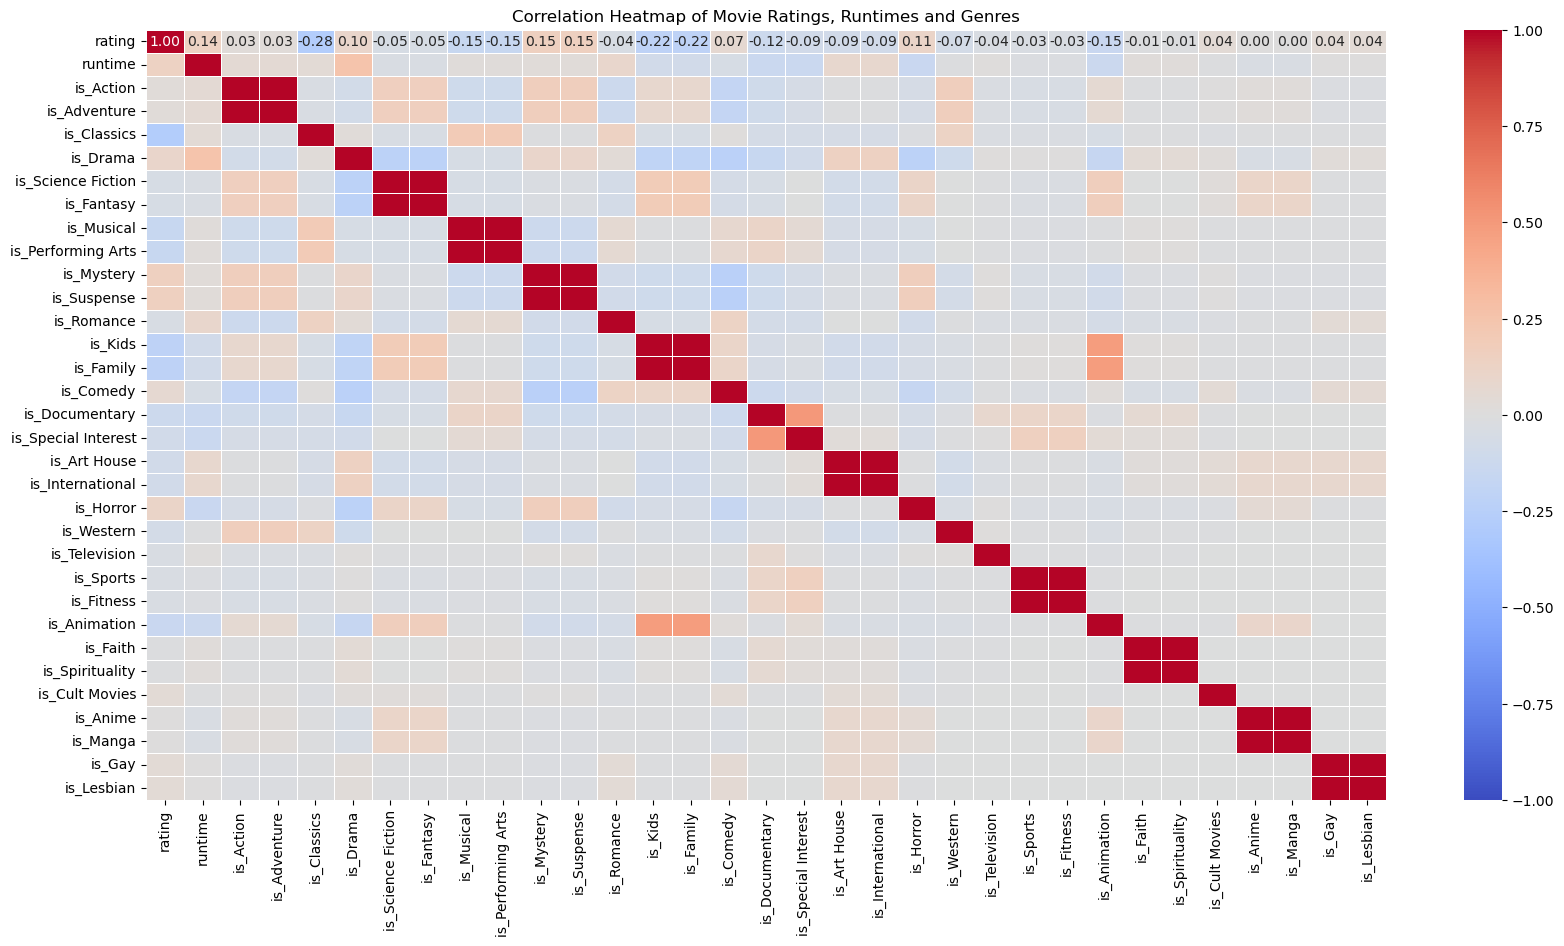

In [99]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

rtmdf_copy = rtmdf.copy()

# Convert 'rating' from object to numeric using Label Encoding
le = LabelEncoder()
rtmdf_copy['rating'] = le.fit_transform(rtmdf['rating'])

# Selecting the columns of interest
columns_of_interest = ['rating', 'runtime', 'is_Action',
       'is_Adventure', 'is_Classics', 'is_Drama', 'is_Science Fiction',
       'is_Fantasy', 'is_Musical', 'is_Performing Arts', 'is_Mystery',
       'is_Suspense', 'is_Romance', 'is_Kids', 'is_Family', 'is_Comedy',
       'is_Documentary', 'is_Special Interest', 'is_Art House',
       'is_International', 'is_Horror', 'is_Western', 'is_Television',
       'is_Sports', 'is_Fitness', 'is_Animation', 'is_Faith',
       'is_Spirituality', 'is_Cult Movies', 'is_Anime', 'is_Manga', 'is_Gay',
       'is_Lesbian']

# Creating a subset of the DataFrame with the specified columns
Heatmap_df = rtmdf_copy[columns_of_interest]

# Computing the correlation matrix
correlation_matrix = Heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Movie Ratings, Runtimes and Genres')
plt.show()

### Production Budget, Worlwide Gross and Profit

An analysis into production Budget, Worldwide Gross and Profit is an excellent starting point for deeper financial analysis and can inform high-level strategic decisions about budget allocation and financial expectations.

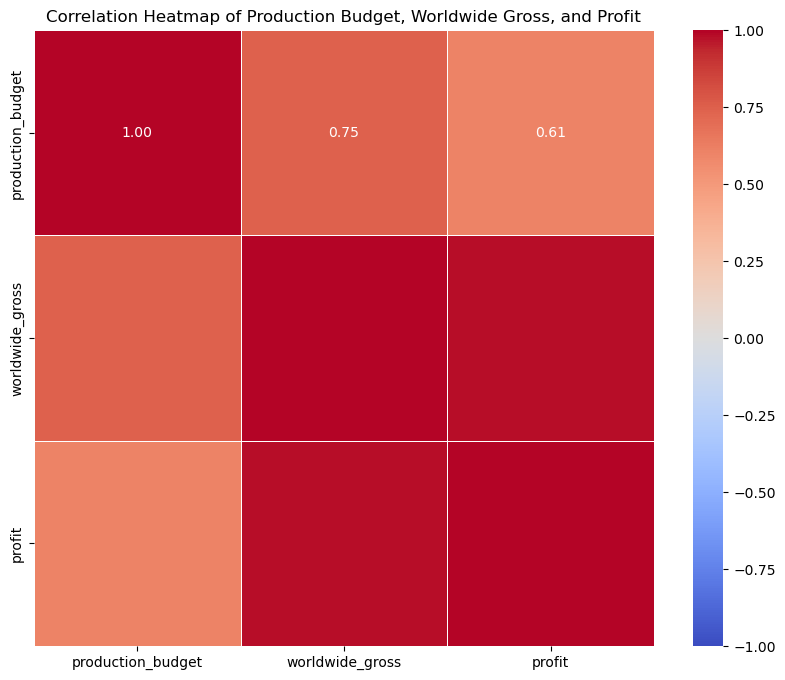

In [100]:
# Selecting the columns of interest
columns_of_interest = ['production_budget', 'worldwide_gross', 'profit']

# Creating a subset of the DataFrame with the specified columns
Heatmap_df = TN_df[columns_of_interest]

# Computing the correlation matrix
correlation_matrix = Heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Production Budget, Worldwide Gross, and Profit')
plt.show()

##### Production Budget vs. Worldwide Gross:
Production budget and worldwide gross show a high positive correlation of approximately 0.75. This means that as the production budget increases, the worldwide gross tends to increase as well. In other words, investing more in production often leads to higher global revenue.<br>
##### Worldwide Gross vs. Profit:
Worldwide gross and profit display an even stronger positive correlation of approximately 0.98. This suggests that higher worldwide gross is strongly associated with higher profit. When a film performs well globally, it tends to generate more profit.<br>
##### Production Budget vs. Profit:
There’s a moderate positive correlation of approximately 0.61 between production budget and profit. Increasing the production budget may lead to increased profits due to this association.